# AnimeGM - PCA
GOAL: Generate new anime-style images
    
Methodology:
1. Build a dataset of images suitable for out needs. There should be at least 1000 images of the same size 28x28?
2. Build a generative model.
3. Train the model
4. Generate a new image with random numbers
5. Apply the this model to a real image
6. Examine results

## 1. Build a dataset
Pull in an existing dataset and modify it for my needs.

Lets start with the danbooru 2017 anime image dataset. Now this dataset is huge. So we are only going to use 1 torrent of the SFW subset.

### Load 1 image from the danbooru dataset

In [19]:
import pandas as pd
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import seaborn as sns; sns.set()
from skimage.transform import resize
%matplotlib inline

In [20]:
def gray_scale_resize(image, reshape_dim):
    # convert image to grayscale
    # same computation while we experiment
    gray_image = color.rgb2gray(image)
    
    # Resize the image down to 128x128
    resized_image = resize(gray_image, (reshape_dim, reshape_dim))
    
    return resized_image

In [21]:
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [22]:
reshape_dim = 256

In [23]:
# read an image
image = misc.imread('danbooru-small/1800.jpg')

C:\Users\Admin\Anaconda3\envs\jupyter\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [24]:
image.shape

(512, 512, 3)

In [25]:
resized_image = gray_scale_resize(image, reshape_dim)

C:\Users\Admin\Anaconda3\envs\jupyter\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


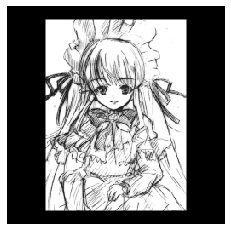

In [26]:
# display an image
show_image(resized_image)

### Load 2 images from the danbooru dataset
We've loaded 1 image of the dataset but lets load 2 as a pandas dataframe so that we can work with it

In [14]:
def load_images(paths_list, n_images, reshape_dim):
    # slice paths list to the amount we want
    slice_paths_list = paths_list[:n_images]

    # create an array for images
    images = np.zeros((n_images, reshape_dim, reshape_dim), dtype=np.float32)
        
    for i, image_path in enumerate(slice_paths_list): 
        # read image
        image = misc.imread(join(path, image_path))

        # rescale image
        images[i] = gray_scale_resize(image, reshape_dim)
        
    return images

In [15]:
def plot_image(images, figsize=(10, 10)):
    # get the number of images
    n_images = images.shape[0]
    # get the square root of the number of images
    squareroot = int(np.ceil(np.sqrt(n_images)))
    
    fig, ax = plt.subplots(squareroot, squareroot, figsize=figsize,
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for i, axi in enumerate(ax.flat):
        # exit if the index of subplots is greater than amount of images
        if i >= n_images:
            return
        im = axi.imshow(images[i], cmap='gray')

In [16]:
from os import listdir
from os.path import join

In [17]:
path = 'danbooru-small'
paths_list = listdir(path)
n_images = 100

In [18]:
# load images
images = load_images(paths_list, n_images, reshape_dim)

._1630801.jpg
._1633801.jpg
._1649801.jpg
._1655801.jpg
._1656801.jpg
._1663801.jpg
._1670801.jpg
._1679801.jpg
._1683801.jpg
._1686801.jpg
._1687801.jpg
._1688801.jpg
._1690801.jpg
._1695801.jpg
._1710801.jpg
._1711801.jpg
._1715801.jpg
._1719801.jpg
._1724801.jpg
._1727801.jpg
._1735801.jpg
._1745801.jpg
._1751801.jpg
._1752801.jpg
._1753801.jpg
._1758801.jpg
._1761801.jpg
._1770801.jpg
._1772801.jpg
._1773801.jpg
._1780801.jpg
._1782801.jpg
._1785801.jpg
._1790801.jpg
._1791801.jpg
._1792801.jpg
._1795801.jpg
._1797801.jpg
._1810801.jpg
._1814801.jpg
._1816801.jpg
._1821801.jpg
._1822801.jpg
._1828801.jpg
._1830801.jpg
._1832801.jpg
._1836801.jpg
._1838801.jpg
._1839801.jpg
._1843801.jpg
._1846801.jpg
._1848801.jpg
._1851801.jpg
._1852801.jpg
._1853801.jpg
._1858801.jpg
._1861801.jpg
._1866801.jpg
._1867801.jpg
._1869801.jpg
._1874801.jpg
._1884801.jpg
._1888801.jpg
._1890801.jpg
._1893801.jpg
._1897801.jpg
._1898801.jpg
._1899801.jpg
._1904801.jpg
._1906801.jpg
._1907801.jpg
._1910

In [ ]:
# plot the images of the dataset
plot_image(images)

## 2. Build a generative model
We will perform Principal Component Analysis to preserve 99% of the variance.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# reshape the images
reshaped_images = images.reshape(-1, reshape_dim*reshape_dim)

In [ ]:
# fit the images and determine the number of components to use
pca = PCA().fit(reshaped_images)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
optimal_n_components = 600

## 3. Train the model

Fit the PCA with the optimal number of components

In [ ]:
pca = PCA(n_components=optimal_n_components, whiten=True)
pca.fit(reshaped_images)

## 4. Generate a new image
Use the trained PCA to generate a new projected data

In [ ]:
n_new_images = 10

Generate a random image of the shape needed to feed the PCA inverse transform

In [ ]:
np.random.RandomState(seed=0)
images_new = np.random.rand(n_new_images, optimal_n_components)

Use the inverse transform of the PCA object to construct the new image

In [ ]:
transformed_images_new = pca.inverse_transform(images_new)

In [ ]:
transformed_images_new_reshaped = transformed_images_new.reshape(n_new_images, reshape_dim, reshape_dim)

In [ ]:
plot_image(transformed_images_new_reshaped)

## 5. Apply model to a real image

In [ ]:
from skimage import data

In [ ]:
# grab an image
test_image = data.astronaut()

In [ ]:
resized_test_image = gray_scale_resize(test_image, reshape_dim)

In [ ]:
# reshape the image
reshaped_test_image = resized_test_image.reshape(-1, reshape_dim*reshape_dim)

In [ ]:
# transform the image with PCA
transform_test_image = pca.transform(reshaped_test_image)

Use the inverse transform of the PCA object to construct the new image

In [ ]:
regenerated_test_image = pca.inverse_transform(transform_test_image)

In [ ]:
regenerated_test_image_reshaped = regenerated_test_image.reshape(reshape_dim, reshape_dim)

In [ ]:
show_image(regenerated_test_image_reshaped)

In [ ]:
# display an image
show_image(resized_test_image)

## 6. Examine results

We seem to need more images for PCA and aren't able to hit the maxima. We'll definately need to increase the number of images used.

Although we can generate images, aren't very meaningful. Lets attempt to take an image of a person's face, and feed that into PCA?

**Results**
64 dim; 100 samples; 8 n_components = not good  
128 dim; 100 samples; 8 n_components = clearer  
128 dim; 100 samples; 80 n_components = more detailed  
128 dim; 200 samples; 80 n_components = blobbly  
128 dim; 200 samples; 175 n_components = starting to resample something...  
128 dim; 300 samples; 175 n_components = the major features of the original image can be seen, but it's blobbly
256 dim; 300 samples; 250 n_components = clearer but still mangled  
256 dim; 400 samples; 250 n_components = even clearer features  
256 dim; 400 samples; 350 n_components = even clearer features 